###### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

##### Settings for theme and palette

In [2]:
# Set the theme and palette
sns.set_theme()
palette = sns.color_palette("flare")
sns.set_palette(palette)

# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [13,8]

# Set maximum columns limit 
pd.set_option('display.max_columns', None)

###### Read data from csv file

Metadata for columns:
- date      : Timestamp
- sitename  : Site name 
- county    : County name 
- aqi       : Air Quality Index 
- pollutant : Name of the pollutant
- status    : status of AQI
- so2       : real-time concentration value of Sulphur Dioxide measured in parts per billion(ppb)
- co        : real-time concentration value of Carbon Monoxide measured in parts per billion(ppb)
- o3        : real-time concentration value of Ozone measured in parts per billion(ppb)
- o3_8hr    : Average Ozone measured in parts per billion(ppb)
- pm10      : Particulate Matter 10 micrograms per cubic meter
- pm2.5     : Particulate Matter 2.5 micrograms per cubic meter
- no2       ： real-time concentration value of Nitrgoen dioxide
- nox       : Nitrogen Oxides
- no        : Nitric Oxide
- windspeed : Wind speed 
- winddirec : Wind direction
- unit : 
- co_8hr    : co every 8 hr measured in parts per billion(ppb)
- pm2.5_avg : Annual average pm2.5 measured in parts per billion(ppb)
- pm10_avg  : Annual average pm10 measured in parts per billion(ppb)
- so2_avg   : Annual average so2 measured in parts per billion(ppb)
- longitude : Longitude of the site location
- latitude  : Latitue of the site location
- siteid    : Site ID

In [3]:
# Read data from csv file 
data = pd.read_csv('2023-2024_AirQuality.csv',na_values=['-', "ND"])

In [4]:
# List few rows of data
data.head()

,Unnamed: 0,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,0,2024-08-31 23:00:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225.0,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,1,2024-08-31 23:00:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184.0,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2,2024-08-31 23:00:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210.0,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,3,2024-08-31 23:00:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.20,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239.0,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,4,2024-08-31 23:00:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259.0,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0


In [5]:
data.drop('Unnamed: 0',axis =1, inplace=True)

##### Check the shape and other info about dataset

In [6]:
# Check shape of the dataset
data.shape

(1232994, 25)

- Dataset contains 1232994 rows and 25 columns

In [7]:
# List information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232994 entries, 0 to 1232993
Data columns (total 25 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1232994 non-null  object 
 1   sitename   1232994 non-null  object 
 2   county     1232994 non-null  object 
 3   aqi        1232643 non-null  float64
 4   pollutant  506810 non-null   object 
 5   status     1228904 non-null  object 
 6   so2        1206347 non-null  float64
 7   co         1215781 non-null  float64
 8   o3         1213008 non-null  float64
 9   o3_8hr     1223379 non-null  float64
 10  pm10       1210672 non-null  float64
 11  pm2.5      1213695 non-null  float64
 12  no2        1207132 non-null  float64
 13  nox        1207132 non-null  float64
 14  no         1207131 non-null  float64
 15  windspeed  1165748 non-null  float64
 16  winddirec  1165305 non-null  float64
 17  unit       0 non-null        float64
 18  co_8hr     1226839 non-null  float64
 19  

In [8]:
# List the column names in the dataset
data.columns

Index(['date', 'sitename', 'county', 'aqi', 'pollutant', 'status', 'so2', 'co',
       'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed',
       'winddirec', 'unit', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg',
       'longitude', 'latitude', 'siteid'],
      dtype='object')

##### Check for duplicated rows

In [9]:
# List the duplicated rows in the dataset
data[data.duplicated()]

,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
595222,2023-11-13 10:00:00,Tamsui,New Taipei City,52.0,PM2.5,Moderate,1.2,0.37,32.7,32.7,31.0,14.0,4.7,7.2,2.4,3.4,20.0,NaN,0.3,16.1,28.0,1.0,121.449239,25.164500,10.0
595273,2023-11-13 10:00:00,Renwu,Kaohsiung City,41.0,NaN,Good,2.2,0.35,26.8,15.4,36.0,18.0,16.4,22.4,6.0,2.6,346.0,NaN,0.3,12.7,25.0,1.0,120.332631,22.689056,49.0
595277,2023-11-13 10:00:00,Fengshan,Kaohsiung City,38.0,NaN,Good,3.2,0.72,23.6,13.5,41.0,20.0,23.8,34.4,10.5,1.1,284.0,NaN,0.5,11.7,36.0,2.0,120.357422,22.628126,50.0
595283,2023-11-13 10:00:00,Annan,Tainan City,31.0,NaN,Good,0.9,0.30,29.3,25.6,42.0,14.0,8.0,10.8,2.7,3.9,314.0,NaN,0.2,9.7,23.0,1.0,120.217500,23.048197,45.0


- Dataset contains 4 duplicated rows. Drop the duplicated rows

In [10]:
# Drop duplicated rows from the dataset
data.drop_duplicates(inplace = True)
# Check shape of the dataset after removal of duplicated rows
data.shape

(1232990, 25)

##### Check for missing values

In [11]:
# Check for % of NaN values for each column in the dataset
data.isnull().mean() * 100

date           0.000000
sitename       0.000000
county         0.000000
aqi            0.028467
pollutant     58.895936
status         0.331714
so2            2.161169
co             1.396037
o3             1.620938
o3_8hr         0.779812
pm10           1.810396
pm2.5          1.565220
no2            2.097503
nox            2.097503
no             2.097584
windspeed      5.453897
winddirec      5.489826
unit         100.000000
co_8hr         0.499193
pm2.5_avg      0.820364
pm10_avg       1.014445
so2_avg        0.832772
longitude      0.000000
latitude       0.000000
siteid         0.000000
dtype: float64

- Column 'unit' has 100% NaN values
- Column 'pollutant' has 50% NaN values
- Rest of columns if any with NaN values have < 5.5% NaN values
- Missing values will be handled at a later stage

###### Check pollutant column

In [12]:
# Check value_counts for pollutant column 
data.pollutant.value_counts(dropna=False)

pollutant
NaN                       726181
PM2.5                     432913
Ozone (8hr)                50079
PM10                       14726
Nitrogen Dioxide (NO2)      8968
Sulfur Dioxide (SO2)         112
Ozone                         11
Name: count, dtype: int64

- The major pollutant is pm2.5 according to this dataset

###### List the percentage of AQI status

In [13]:
# List the percentage for each AQI status 
data.status.value_counts(normalize=True)

status
Good                              0.587591
Moderate                          0.364832
Unhealthy for Sensitive Groups    0.044576
Unhealthy                         0.002990
Very Unhealthy                    0.000007
Hazardous                         0.000003
Name: proportion, dtype: float64

- 59% of the dataset contains data with respect to Good AQI status which is between 0-50
- 36% of the dataset contains data with respect to Moderate AQI status which is between 50-100

###### Analyse the Status column 

In [14]:
data.groupby('status')['pollutant'].value_counts(dropna=False)

status                          pollutant             
Good                            NaN                       722091
Hazardous                       PM10                           4
Moderate                        PM2.5                     385646
                                Ozone (8hr)                40711
                                PM10                       12910
                                Nitrogen Dioxide (NO2)      8968
                                Sulfur Dioxide (SO2)         107
Unhealthy                       PM2.5                       2964
                                Ozone (8hr)                  675
                                PM10                          35
                                Sulfur Dioxide (SO2)           1
Unhealthy for Sensitive Groups  PM2.5                      44303
                                Ozone (8hr)                 8690
                                PM10                        1771
                                Ozo

- From above it can be concluded that the pollutant column is NaN when the AQI status is Good, so this column might overshadow the target if included in list of independent variables which may lead to a data leakage

###### Description of aqi with respect to status

In [15]:
# Descriptive stats for aqi values grouped by status 
data.groupby('status')['aqi'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Good,722091.0,32.45,9.98,0.0,25.0,33.0,41.0,50.0
Hazardous,4.0,407.00,69.30,307.0,395.5,427.0,438.5,467.0
Moderate,448342.0,68.59,13.09,51.0,58.0,66.0,78.0,100.0
Unhealthy,3675.0,155.74,6.60,151.0,152.0,154.0,157.0,200.0
Unhealthy for Sensitive Groups,54779.0,115.89,12.24,101.0,106.0,113.0,124.0,150.0
Very Unhealthy,9.0,221.00,24.46,201.0,202.0,215.0,225.0,280.0


- Air Quality Index
    - 0-50        : Good
    - 50-100      : Moderate Moderate
    - 101-150     : Unhealthy for Sensitive Groups
    - 151-200     : Unhealthy  
    - 201-250     : Very Unhealthy 
    - 251 & Above : Hazardous Hazardous
- The dataset contains more Good AQI than Hazardous AQI values

###### Analyse the data with respect to date column

In [16]:
# Create new columns year,month and day using date column
temp_data = data.copy()

temp_data.date = pd.to_datetime(temp_data.date)
temp_data['year'] = temp_data.date.dt.year
temp_data['month'] = temp_data.date.dt.month
temp_data['day'] = temp_data.date.dt.day
temp_data.head()

,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,year,month,day
0,2024-08-31 23:00:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225.0,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0,2024,8,31
1,2024-08-31 23:00:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184.0,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0,2024,8,31
2,2024-08-31 23:00:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210.0,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0,2024,8,31
3,2024-08-31 23:00:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.20,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239.0,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0,2024,8,31
4,2024-08-31 23:00:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259.0,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0,2024,8,31


In [17]:
# Group by year and list the average for pollutants
temp_data.groupby(['year']).agg({'so2':['min','max'],'co':['min','max'],'o3':['min','max'],'no2':['min','max'],
                                 'nox':['min','max'],'no':['min','max'],'pm2.5':['min','max'],'pm10':['min','max']}).round(2)

so2          co         o3         no2        nox          no         \
      min    max  min   max  min    max  min   max  min    max  min    max   
year                                                                         
2023  0.0  255.4  0.0  7.42  0.0  147.5  0.0  82.0  0.0  316.7  0.0  265.4   
2024  0.0   80.4  0.0  5.32  0.0  133.4  0.0  77.8  0.0  278.6  0.0  251.3   

     pm2.5        pm10          
       min    max  min     max  
year                            
2023   0.0  165.0  0.0  1072.0  
2024   0.0  229.0  0.0   462.0

- The values for various pollutants like so2,co,o3,no2,nox,no concentrates were higher in the year 2023 than 2024 according to this data.
- The values for pollutants like pm2.5 and pm10 were higher in the year 2024 compared to 2023.

###### Plot AQI status for year 2023-2024

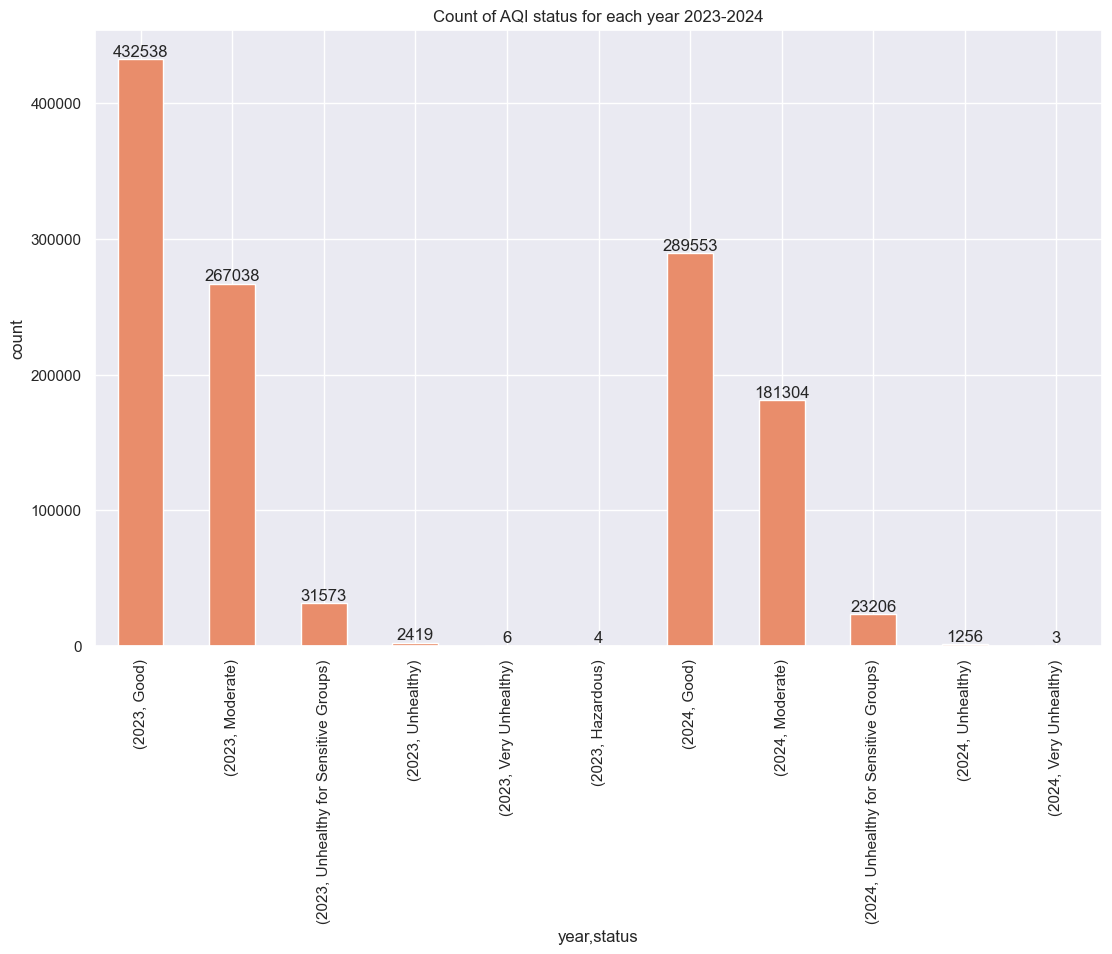

In [18]:
# Plot the count of various AQI Status for each year
plt.figure(figsize=(13,8))
ax = temp_data.groupby('year')['status'].value_counts().plot(kind='bar',ylabel='count')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Count of AQI status for each year 2023-2024")
plt.show()

- The year 2023 has the highest count for Good AQI status

###### List the month and year with worst AQI

In [19]:
# List the top 5 worst AQI levels grouped by year and month
temp_data.groupby(['year','month'])['aqi'].max().sort_values(ascending=False).head(5)

year  month
2023  1        467.0
2024  5        202.0
2023  4        197.0
2024  2        197.0
2023  10       195.0
Name: aqi, dtype: float64

-  The worst level of AQI(Hazardous) was recorded in January 2023, followed by Unhealthy AQI in May of year 2024.

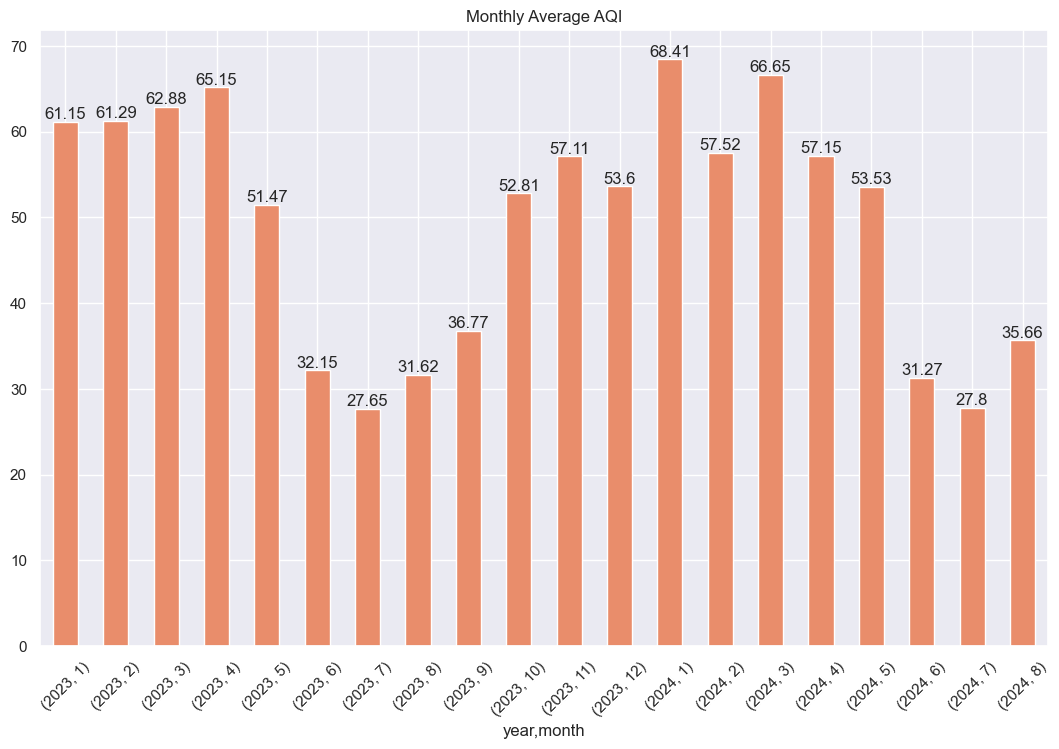

In [20]:
ax = temp_data.groupby(['year','month'])['aqi'].mean().round(2).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Monthly Average AQI")
plt.xticks(rotation = 45)
plt.show()

- The Monthly average aqi is lowest during the month of July in both 2023 and 2024

###### Plot the average AQI for various counties

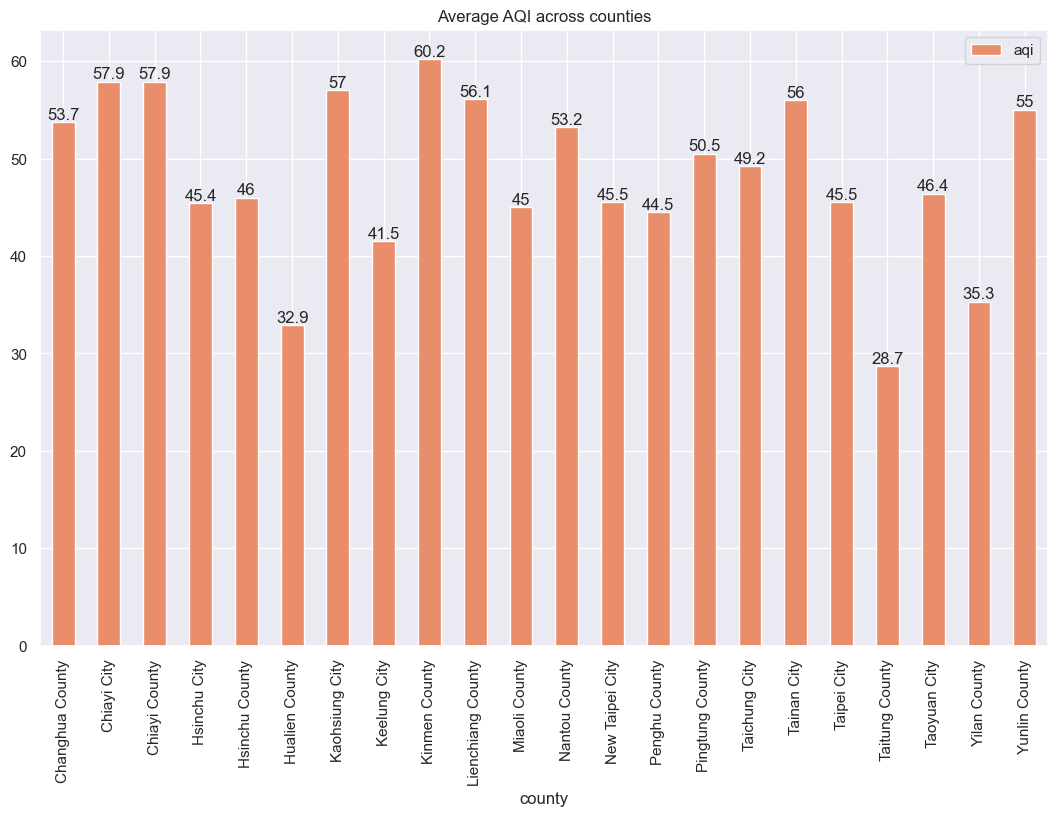

In [21]:
# Plot the county which recorded the most count for worst AQIs
ax = (data).groupby('county').agg({'aqi':'mean'}).round(1).plot(kind='bar')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Average AQI across counties")
plt.xticks(rotation = 90)
plt.show()

- Kinmen county has the higher average AQI over the period of 2023-2024, indicating that this county has worst AQI index compared to the rest.
- Taitung county has the lowest average AQI over the period of 2023-2024, indicating that this county has best AQI index compared to the rest.

###### Plot the count for each AQI status

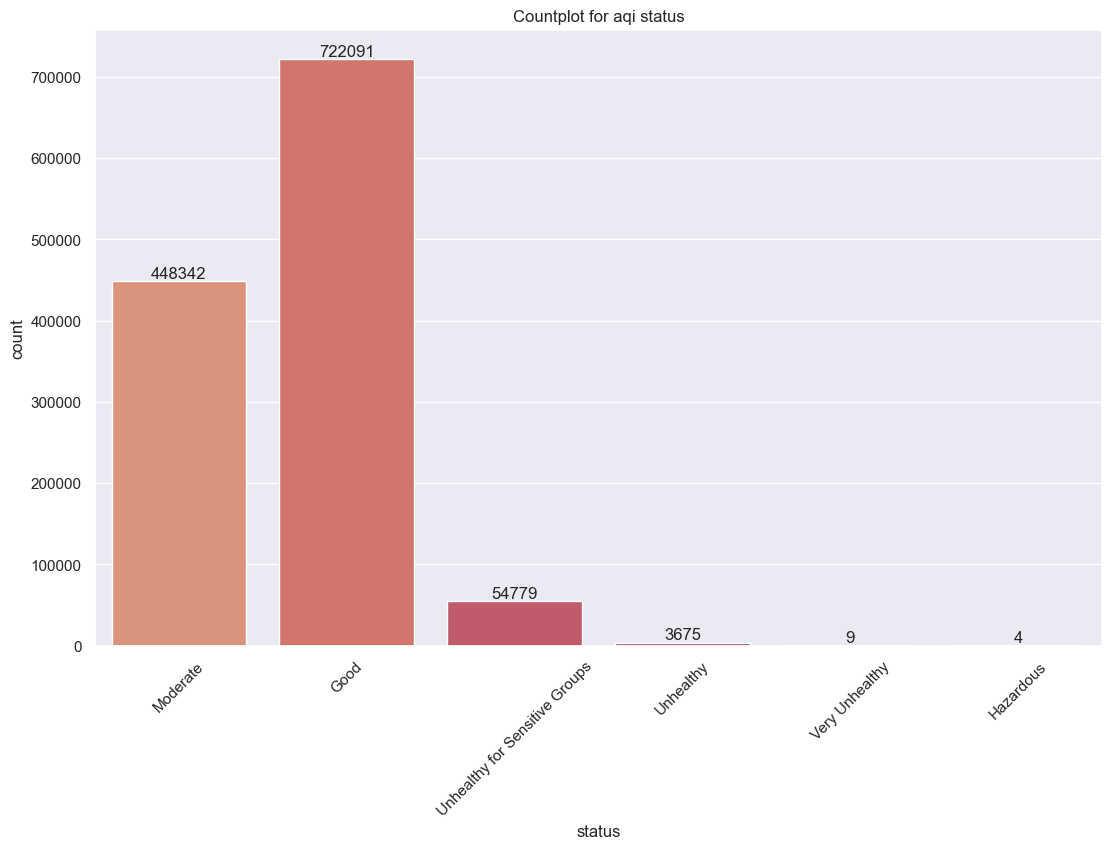

In [22]:
# Plot the count for various AQI status
ax = sns.countplot(x = 'status' , data = data);
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Countplot for aqi status")
plt.xticks(rotation = 45)
plt.show()

- Most of the data contains Good AQI followed by Moderate AQI, only 4 Hazardous AQI have been recorded
- Good AQI - 58.75%
- Moderate - 36.48%
- Unhealthy for Sensitive Groups - 4.45%
- Unhealthy, Very Unhealthy & Hazardous contribute to remaining 0.32%

###### Drop the NaN values 

In [23]:
# Drop columns which are insignificant for model building
data = data.drop(['unit','pollutant','siteid','longitude','latitude','county','sitename','date','status'], axis = 1)

- Drop columns which are not useful for model building
    - Column 'unit' is dropped as it contains 100% NaN values 
    - Column 'pollutant' is dropped as it can directly overshadow the target because when status is good pollutant column is NaN
    - Columns 'sitedid','longitude','latitude','county','sitename','date' are dropped as they are not insignificant for regression model
    - Column 'status' is dropped as it can overshadow the target 'aqi' and lead to data leakage 

In [24]:
# Check for NaN values after dropping few columns
data.isnull().mean() * 100

aqi          0.028467
so2          2.161169
co           1.396037
o3           1.620938
o3_8hr       0.779812
pm10         1.810396
pm2.5        1.565220
no2          2.097503
nox          2.097503
no           2.097584
windspeed    5.453897
winddirec    5.489826
co_8hr       0.499193
pm2.5_avg    0.820364
pm10_avg     1.014445
so2_avg      0.832772
dtype: float64

- Drop NaN values as this will not help with model building since we have a large dataset
- The percentage of NaN values are less than 5% for all columns  so will be dropping these columns 

In [25]:
# Drop NaN values
data.dropna(inplace = True)
data.shape

(1102281, 16)

- The dataset contains 1102281 rows after initial processing

In [26]:
# Check for null values after cleaning
data.isnull().mean() * 100

aqi          0.0
so2          0.0
co           0.0
o3           0.0
o3_8hr       0.0
pm10         0.0
pm2.5        0.0
no2          0.0
nox          0.0
no           0.0
windspeed    0.0
winddirec    0.0
co_8hr       0.0
pm2.5_avg    0.0
pm10_avg     0.0
so2_avg      0.0
dtype: float64

- There are no NaNs in the dataset after initial data cleaning

###### Datatype conversion

In [27]:
float_data_col  = ['aqi','so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
                   'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg','so2_avg']

# Convert datatype from float64 to float32 
for c in float_data_col:
    data[c] = data[c].astype('float32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102281 entries, 0 to 1232993
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   aqi        1102281 non-null  float32
 1   so2        1102281 non-null  float32
 2   co         1102281 non-null  float32
 3   o3         1102281 non-null  float32
 4   o3_8hr     1102281 non-null  float32
 5   pm10       1102281 non-null  float32
 6   pm2.5      1102281 non-null  float32
 7   no2        1102281 non-null  float32
 8   nox        1102281 non-null  float32
 9   no         1102281 non-null  float32
 10  windspeed  1102281 non-null  float32
 11  winddirec  1102281 non-null  float32
 12  co_8hr     1102281 non-null  float32
 13  pm2.5_avg  1102281 non-null  float32
 14  pm10_avg   1102281 non-null  float32
 15  so2_avg    1102281 non-null  float32
dtypes: float32(16)
memory usage: 75.7 MB


- Convert float64 to float32 in order to reduce memory usage

##### Descriptive Statistics

In [28]:
# Description of the various columns in the dataset
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
aqi,1102281.0,49.76,25.88,5.0,31.00,44.00,64.00,467.00
so2,1102281.0,1.22,1.05,0.0,0.60,1.00,1.50,137.60
co,1102281.0,0.29,0.17,0.0,0.18,0.26,0.36,3.29
o3,1102281.0,30.34,17.69,0.0,16.50,28.40,41.90,147.50
o3_8hr,1102281.0,30.53,15.36,0.0,18.60,29.10,40.80,107.90
pm10,1102281.0,29.93,20.33,0.0,16.00,25.00,39.00,1072.00
pm2.5,1102281.0,14.84,10.72,0.0,7.00,12.00,20.00,229.00
no2,1102281.0,9.31,7.11,0.0,4.20,7.50,12.40,82.00
nox,1102281.0,11.44,9.81,0.0,5.20,8.80,14.40,185.80
no,1102281.0,2.09,4.12,0.0,0.60,1.10,1.90,142.30


- AQI values range from 5 to 467, with a mean of 49.76, indicating that most the data contains good AQI as compared to Hazardous AQI values. The median is 44 showing that there is slight skew towards better air quality.
- so2 ranges from 0.0 to 137, with 75% of the data below the value of 1.5 which indicates lesser concentrates of so2 in the atmosphere most of the time.
- co concentrates range from 0.0 to 3.29 indicating lesser impact on the AQI values with a mean of 0.29.
- o3 ranges from 0.0 to 147.0 with 75% of the data having value lesser than or equal to 41.90
- pm10 ranges from 0.0 to 1072.0 with 75% of the data below 39.0 indicating lesser concentrates of pm10 in that atmosphere most of the time. But the max value indicates unusual presence of pm10 values at times in atmosphere.
- pm2.5 ranges from 0.0 to 229.0 with 75% of the data below 20.0 indicating lesser concentrates of pm10 in that atmosphere most of the time.
- no2 concentrates ranges from 0.0 to 82.0 with a mean of 9.31, indicating good value most of the time.
- nox concentrates ranges from 0.0 to 185.0 with a mean of 11.44, indicating good value most of the time.
- no concentrates ranges from 0.0 to 142.30 with a mean of 2.09, indicating good value most of the time.
- winddirec has max value as 999.00 which is not possible as winddirec is measured in degrees from 0 to 359 degrees.
- There are negative values in column windspeed , it might be due to instrument calibrations. Will not be taking any action for this.

###### Analyse the winddirec column

In [29]:
# Check for wind direction  equal to or greater than 360 degrees
data[data.winddirec >= 360].shape[0]

1361

- winddirec column contains value >= 360, as winddirec is measured in degrees this value should be ranging from 0 to 359 degrees only. Hence will be dropping the rows to avoid inconsistency in data.

In [30]:
# Excluding rows which have wind direction equal to or greater than 360 as it can vary from 0 to 359 only
data = data[data.winddirec < 360]
data.shape

(1100920, 16)

In [31]:
data.head()

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
0,62.0,0.9,0.17,35.0,40.200001,18.0,17.0,2.3,2.6,0.3,2.3,225.0,0.2,20.1,26.0,1.0
1,50.0,1.6,0.32,27.9,35.099998,27.0,14.0,7.6,9.3,1.6,1.1,184.0,0.2,15.3,23.0,1.0
2,45.0,0.4,0.17,25.1,40.599998,21.0,13.0,2.9,4.1,1.1,0.4,210.0,0.2,13.8,24.0,0.0
3,42.0,0.8,0.20,30.0,35.900002,19.0,10.0,4.0,4.8,0.7,1.9,239.0,0.2,13.0,26.0,1.0
4,50.0,1.0,0.16,33.5,35.900002,18.0,14.0,1.8,3.1,1.2,1.8,259.0,0.1,15.3,28.0,1.0


###### KDE plot for all numeric columns

In [32]:
numeric = [col for col in data.columns if data[col].dtype == 'float32' and col != 'aqi']

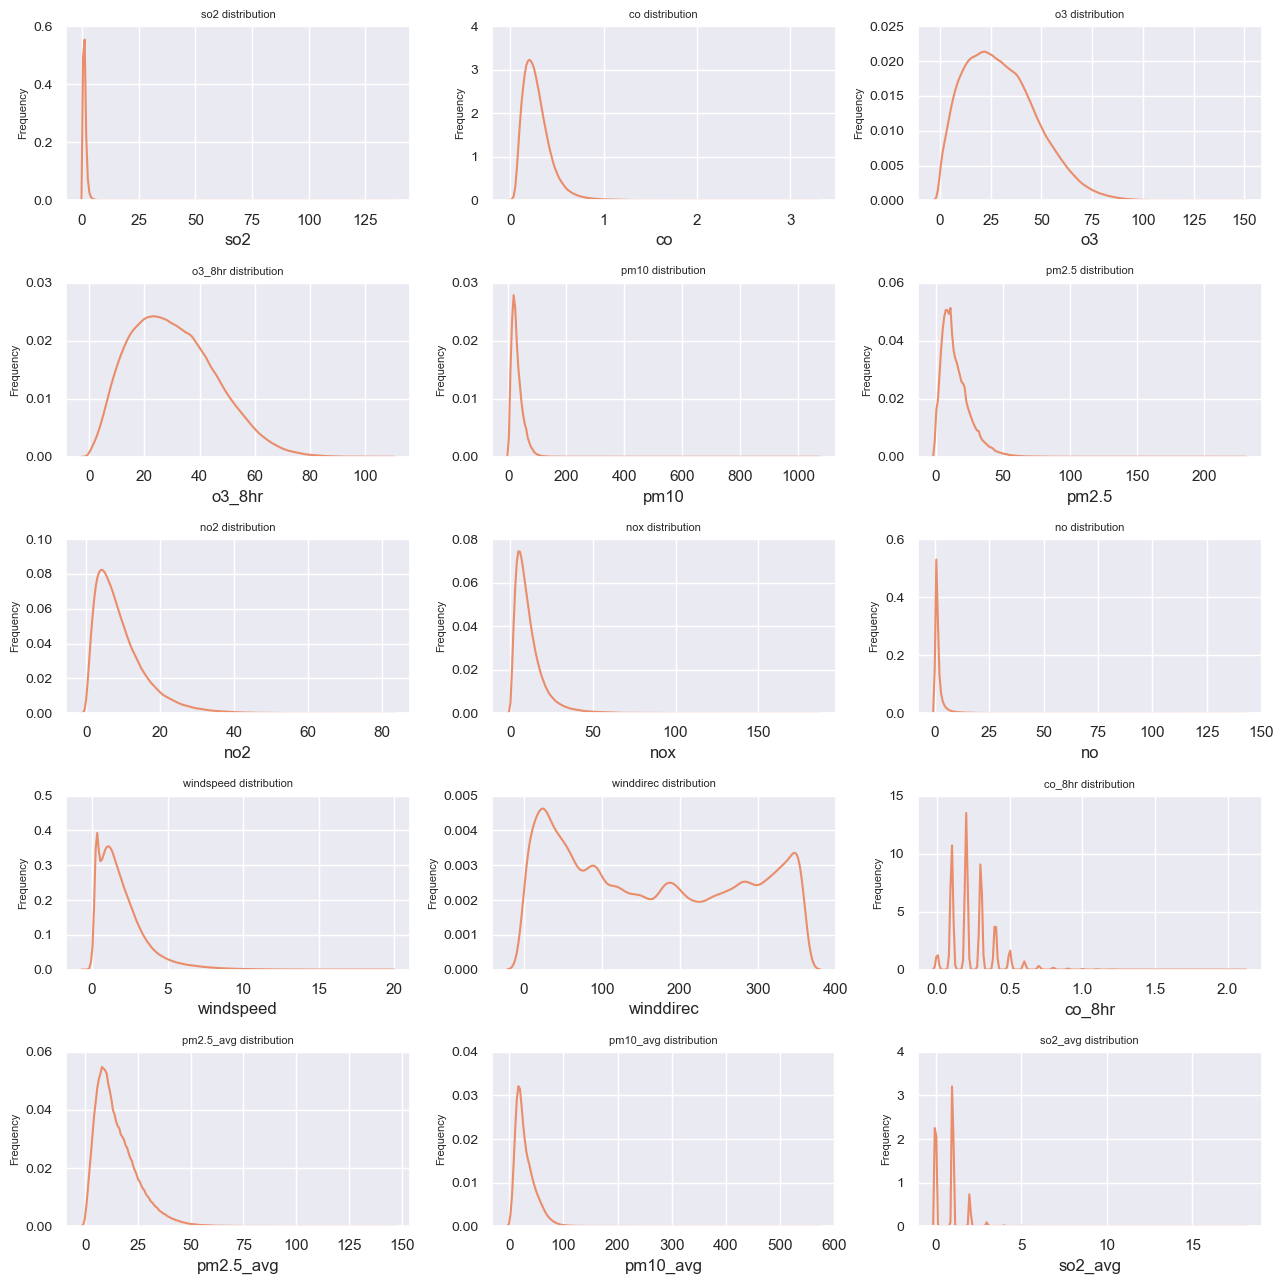

In [33]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (13, 13))

# Flatten the 2D array of axes into a 1D array 
ax = ax.flatten()

# Loop through each numeric column to create a kernel density estimate (KDE) plot
for i, col in enumerate(numeric):
    # Plotting the KDE for the current numeric column on the corresponding subplot
    sns.kdeplot(x = col, data = data, ax = ax[i])
    
    # Set the y-ticks to the current y-ticks for better visualization
    ax[i].set_yticks(ax[i].get_yticks())
    
    # Adjust the y-axis tick parameters (size)
    ax[i].tick_params(axis = 'y', labelsize = 10)
    
    # Set the title for the current subplot with the column name
    ax[i].set_title(f'{col} distribution', fontsize = 8)
    
    # Label the y-axis as 'Frequency'
    ax[i].set_ylabel('Frequency', fontsize = 8)

# Adjust the layout to prevent overlap of subplot elements
plt.tight_layout()

- Distribution of independent variables are mostly highly skewed suggesting presence of outliers

###### Boxplot for numeric columns

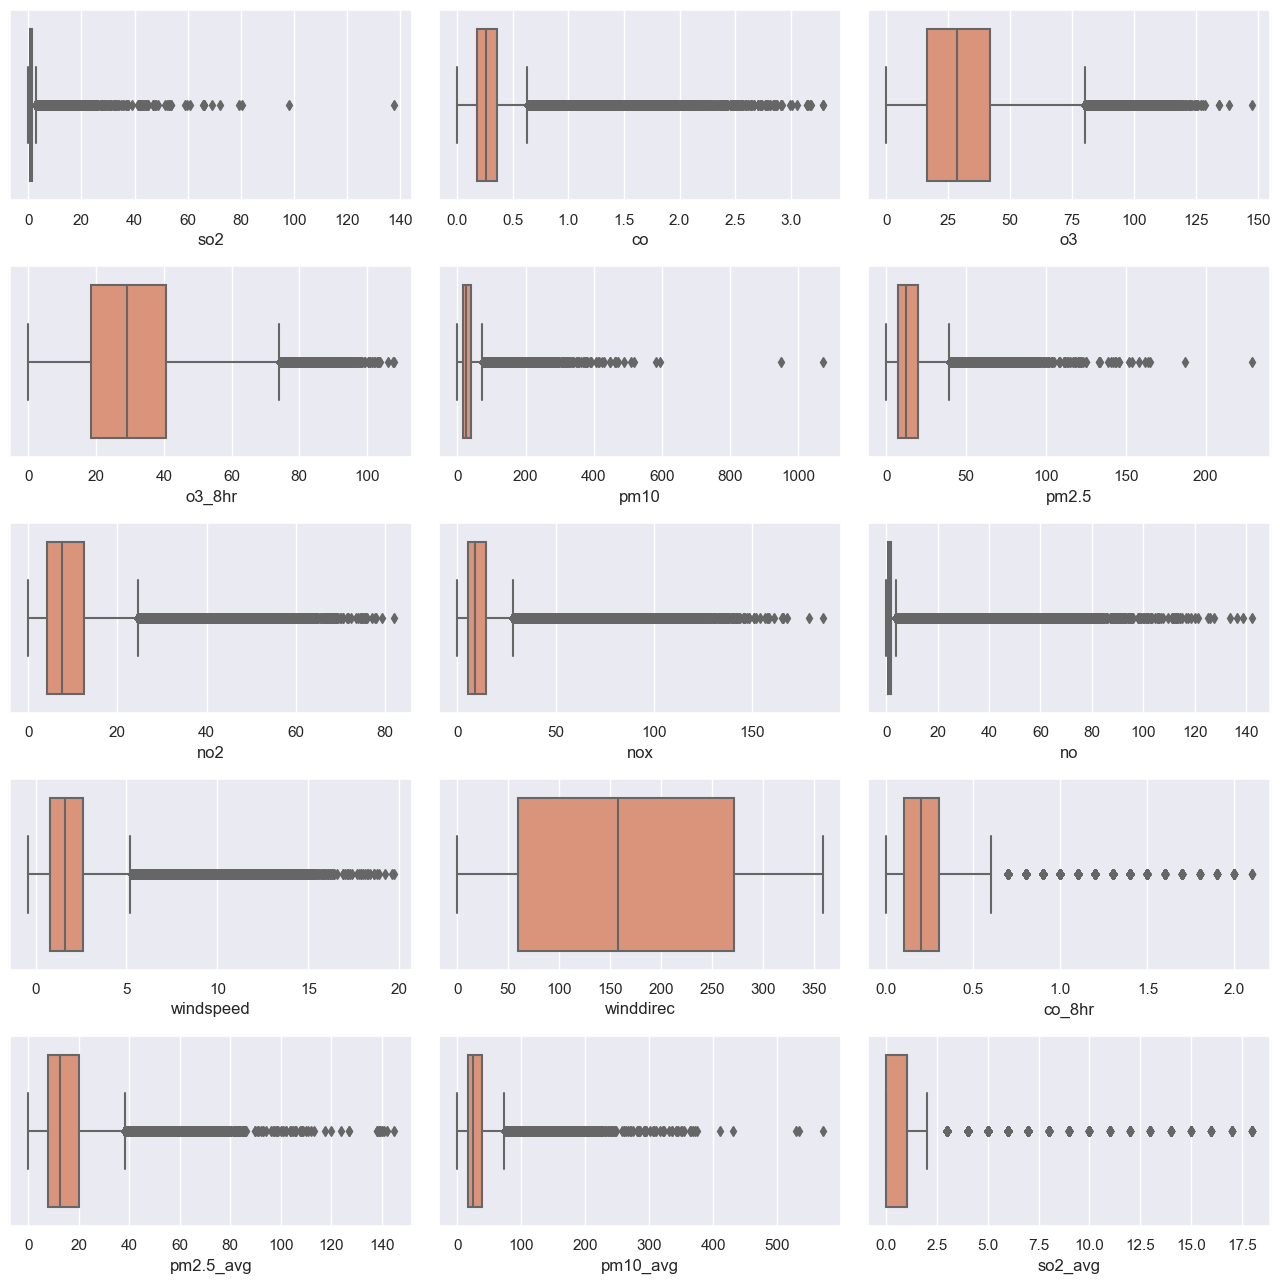

In [34]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (13, 13))

# Flatten the 2D array of axes into a 1D array for easier indexing
ax = ax.flatten()

# Loop through each numeric column to create a Box plot
for i, col in enumerate(numeric):
    # Plotting the Boxplot for the current numeric column on the corresponding subplot
    sns.boxplot(x = col, data = data, ax = ax[i])

plt.tight_layout()

- There are extreme values present for columns charted above. These might be due to technical issues or could be due to the high pollution in the air and due to lack of domain knowledge will be taking any actions for these extreme values.

###### Heatmap correlation among the numeric columns

<Axes: >

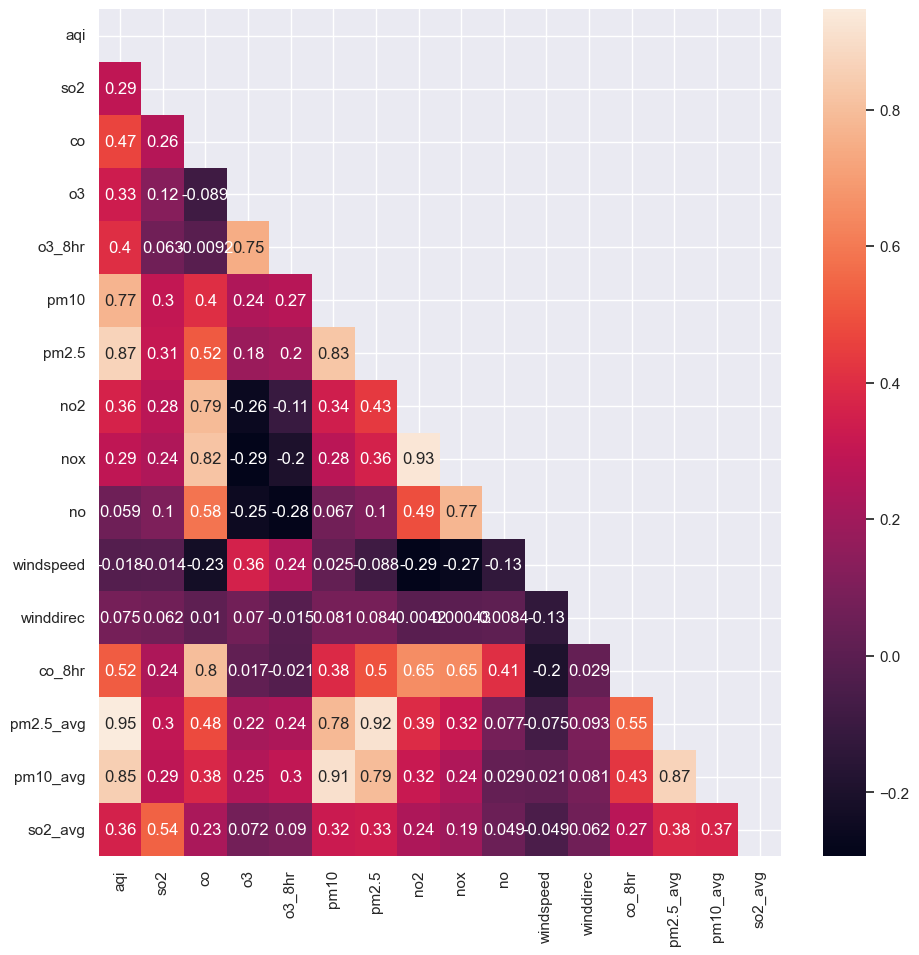

In [35]:
# Plot heatmap to find the correlation between columns
plt.figure(figsize=(11, 11))
mask = np.triu(np.ones_like(data.corr(numeric_only=True)))
sns.heatmap(data.corr(numeric_only=True), annot=True, mask=mask)

- pm10, pm2.5, pm2.5_avg, pm10_avg are highly positively correlated with the target 'aqi'

###### Train Test Split for Independent and Dependent variable

In [36]:
# Assign Independent features into X 
X = data.drop(labels = 'aqi', axis = 1)
# Assign Dependant variable into y
y = data['aqi']

In [37]:
# Split X & y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [38]:
# Display the shapes for X_train, y_train, X_test, y_test
print("X_train :",X_train.shape)
print("X_test  :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test  :",y_test.shape)

X_train : (880736, 15)
X_test  : (220184, 15)
y_train : (880736,)
y_test  : (220184,)


###### Function to fit and predict for a model

In [39]:
##################################################################
# Function : train_predict(model, X_train, y_train, X_test, y_test)
#            To fit and predict for a tree based model 
# Input    : model object , X_train, y_train, X_test, y_test
# Output   : Returns a dataframe with Feature Importance
###################################################################

def train_predict(model, X_train, y_train, X_test, y_test):
    
    # Fit the train data
    model.fit(X_train,y_train)
    print("-"*115)
    print(model)
    print(model.get_params())
    print("-"*115)
    
    print("TRAINING DATA PREDICTION")
    
    # Predict on train data and generate metrics
    y_pred_train = model.predict(X_train)
    
    print("Sample train output")
    print(y_pred_train)
    
    # Print r2_score for train data
    print("R^2 Score = ",r2_score(y_train,y_pred_train))
    
    # Print RMSE for train data
    print("RMSE = ",root_mean_squared_error(y_train,y_pred_train))
    print("-"*115)
    
    print("TEST DATA PREDICTION")
    
    # Predict on test data and generate metrics
    y_pred_test = model.predict(X_test)
    
    print("Sample test output")
    print(y_pred_test)
    
    # Print r2_score for test data
    print("R^2 Score = ",r2_score(y_test,y_pred_test))
    
    # Print RMSE for test data
    print("RMSE = ",root_mean_squared_error(y_test,y_pred_test))
    print("-"*115)
    
    # Return Feature Importance as a dataframe
    return(pd.DataFrame(model.feature_importances_, index = model.feature_names_in_, 
                        columns = ['Feature_Importance']))

#### Intermediate step -1  : Check for possible data leakage by any feature

In [40]:
# Create instance of RandomForestRegressor
rfr_1 = RandomForestRegressor(random_state = 42, oob_score=True)

In [41]:
# Fit and predict using the RandomForestRegressor model
train_predict(rfr_1, X_train, y_train, X_test, y_test)

-------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(oob_score=True, random_state=42)
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
-------------------------------------------------------------------------------------------------------------------
TRAINING DATA PREDICTION
Sample train output
[49.   24.   40.   ... 33.62 61.9  59.25]
R^2 Score =  0.9999015940176605
RMSE =  0.2569357958837366
-------------------------------------------------------------------------------------------------------------------
TEST DATA PREDICTION
Sample test output
[ 23.45  77.35

,Feature_Importance
so2,0.000211
co,0.000029
o3,0.000044
o3_8hr,0.089495
pm10,0.000199
pm2.5,0.000025
no2,0.004948
nox,0.000030
no,0.000027
windspeed,0.000071


- From above intermediae step 1 it is evident that the variable pm2.5_avg contributes to 90% towards target casuing a possible data leakage, so this variable will be removed and we try to build the model

#### Intermediate step -2 : Look for least contributing features towards target

In [42]:
# Drop columns pm2.5_avg as it was creating a data leakage towards target aqi
X_train_1 = X_train.drop(['pm2.5_avg'], axis=1)
X_test_1  = X_test.drop(['pm2.5_avg'], axis=1)

# List parameters for hyperparameter tuning
param_grid = { 
    'n_estimators': [150], 
    'max_features': ['sqrt'], 
    'max_depth': [8,12], 
    'max_leaf_nodes': [50,100], 
} 

In [43]:
# Create instance of RandomForestRegressor
rfr_tune = RandomForestRegressor(random_state = 42, oob_score=True)

# Create instance of Random CV search with above listed parameters
rfr_cv = RandomizedSearchCV(rfr_tune, param_distributions= param_grid, cv = 5, random_state = 42)

# Run a Random CV Search on RandomForestRegressor model to fine tune hyperparameters
rfr_cv.fit(X_train_1, y_train)

/Users/adella/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   param_distributions={'max_depth': [8, 12],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [50, 100],
                                        'n_estimators': [150]},
                   random_state=42)

In [44]:
# Create a model with the best parameters from above Random CV search best parameters
rfr_model = RandomForestRegressor(random_state=42,
                                  n_estimators = rfr_cv.best_params_.get('n_estimators'),
                                  max_depth = rfr_cv.best_params_.get('max_depth'),
                                  max_features = rfr_cv.best_params_.get('max_features'),
                                  max_leaf_nodes = rfr_cv.best_params_.get('max_leaf_nodes'),
                                  oob_score = True)

# Fit the model with train and predict on test
train_predict(rfr_model, X_train_1, y_train, X_test_1, y_test)

-------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=100,
                      n_estimators=150, oob_score=True, random_state=42)
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
-------------------------------------------------------------------------------------------------------------------
TRAINING DATA PREDICTION
Sample train output
[45.36251867 27.17960699 37.11959017 ... 38.32717485 59.71768222
 54.38137244]
R^2 Score =  0.9032334761573717
RMSE =  8.057056946771695
---------------------------------------

,Feature_Importance
so2,0.010904
co,0.039744
o3,0.024651
o3_8hr,0.069310
pm10,0.153591
pm2.5,0.286432
no2,0.005471
nox,0.004692
no,0.001007
windspeed,0.000308


- From above intermediae step 2 it is evident that the variables 'o3','so2_avg','so2','no2','nox','no','windspeed','winddirec' contributes to lesser than 2-2.5% towards target. Hence these variables will be removed to improve model interpretability and performance

### Final Step : Model Building using RandomForestRegressor

###### Removing insignificant variables or ones that were causing data leakage
- Drop column pm2.5_avg as it was causing a data leakage towards the target aqi (Refer Intermediate step - 1)
- Drop columns 'o3','so2_avg','so2','no2','nox','no','windspeed','winddirec' as there variables were contributing lesser than 2% towards the target aqi (Refer Intermediate step - 2)

In [45]:
# Drop column pm2.5_avg as it was causing a data leakage towards the target aqi
# Drop columns 'o3','so2_avg','so2','no2','nox','no','windspeed','winddirec' 
X_train_2 = X_train.drop(['pm2.5_avg','o3','so2_avg','so2','no2','nox','no','windspeed','winddirec'], axis=1)
X_test_2  = X_test.drop(['pm2.5_avg','o3','so2_avg','so2','no2','nox','no','windspeed','winddirec'], axis=1)

###### Hyperparameters Tuning

In [46]:
# List parameters for hyperparameter tuning
param_grid = { 
    'n_estimators': [150], 
    'max_features': ['sqrt'], 
    'max_depth': [8,12], 
    'max_leaf_nodes': [50,100], 
} 

In [47]:
# Create instance of Random Forest Regressor
rfr_tune = RandomForestRegressor(random_state = 42, oob_score=True)

# Create instance of Random CV search with above listed parameters
rfr_cv = RandomizedSearchCV(rfr_tune, param_distributions= param_grid, cv = 5, random_state = 42)

# Run a Random CV Search on RandomForestRegressor model to fine tune hyperparameters
rfr_cv.fit(X_train_2, y_train)

/Users/adella/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   param_distributions={'max_depth': [8, 12],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [50, 100],
                                        'n_estimators': [150]},
                   random_state=42)

In [48]:
# Display the best parameters after Random CV search
rfr_cv.best_params_

{'n_estimators': 150,
 'max_leaf_nodes': 100,
 'max_features': 'sqrt',
 'max_depth': 12}

In [49]:
# Display best score after Random CV search
rfr_cv.best_score_

0.9179930395729976

In [50]:
# Create a model with the best parameters from above Random CV search best parameters
rfr_model = RandomForestRegressor(random_state=42,
                                  n_estimators = rfr_cv.best_params_.get('n_estimators'),
                                  max_depth = rfr_cv.best_params_.get('max_depth'),
                                  max_features = rfr_cv.best_params_.get('max_features'),
                                  max_leaf_nodes = rfr_cv.best_params_.get('max_leaf_nodes'),
                                  oob_score=True)

###### Training, predicting and evaluation metrics

In [51]:
# Fit the model with train and predict on test
train_predict(rfr_model, X_train_2, y_train, X_test_2, y_test)

-------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=100,
                      n_estimators=150, oob_score=True, random_state=42)
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}
-------------------------------------------------------------------------------------------------------------------
TRAINING DATA PREDICTION
Sample train output
[43.91169471 27.91240978 39.72086465 ... 38.4619819  56.70080713
 55.64478601]
R^2 Score =  0.9183380339959984
RMSE =  7.401568773053964
---------------------------------------

,Feature_Importance
co,0.026471
o3_8hr,0.077617
pm10,0.134169
pm2.5,0.333261
co_8hr,0.051228
pm10_avg,0.377255


###### Feature Importance

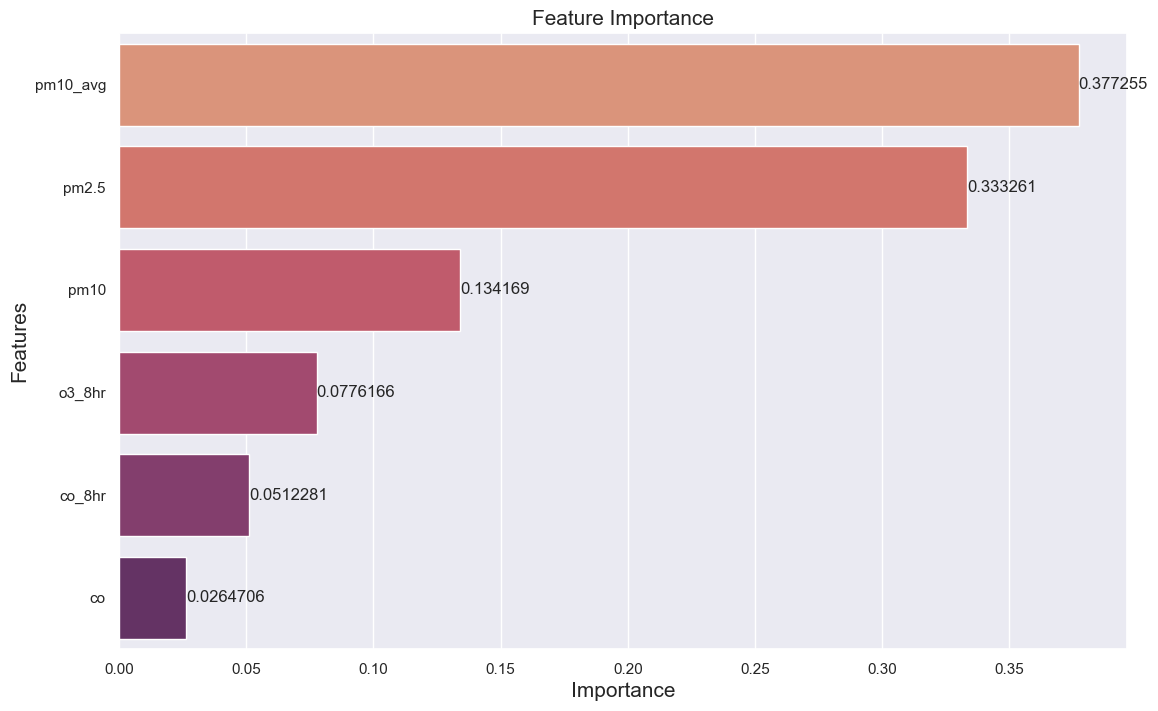

In [52]:
# Create dataframe for feature importance
important_features = pd.DataFrame({'Features': X_train_2.columns, 
                                   'Importance': rfr_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
ax = sns.barplot(x = 'Importance', y = 'Features', data = important_features)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()